Imane Madda: 40208741

Uroosa Lakhani: 40227274

**Data Collection**


Importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, matthews_corrcoef
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# read csv file
df = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin1') # 'latin1' encoding to resolve UnicodeDecodeError issues,
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


**Performing DDA**


**Basic Information About the Data**

getting the mean, median , mode and standard deviation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [ ]:
# Summary statistics
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


**Missing values evalaution**


In [ ]:
df.isnull().sum()
# there are no misisng values in the dataset


,0
City,0
Price,0
Address,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


**Univariate Analysis**

creating a histogram of house prices to show how frequently different price ranges occur. It uses 50 bins for grouping prices and adds a smooth KDE curve to visualize the distribution shape.


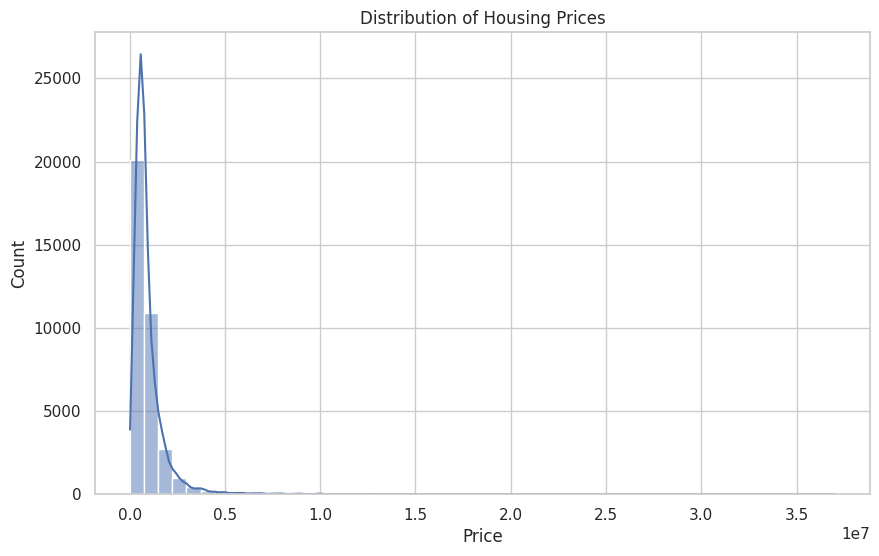

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [ ]:
# Calculating the price statistics
min = df['Price'].min()
max = df['Price'].max()
mean = df['Price'].mean()
median= df['Price'].median()
std = df['Price'].std()

print(f"Minimum price: ${min:,.0f}")
print(f"Maximum price: ${max:,.0f}")
print(f"Mean (average) price: ~${mean:,.0f}")
print(f"Median price: ${median:,.0f}")
print(f"Standard deviation: ~${std:,.0f}")

Minimum price: $21,500
Maximum price: $37,000,000
Mean (average) price: ~$943,296
Median price: $699,000
Standard deviation: ~$1,020,110



The distribution of housing prices is right-skewed, with most homes priced on the lower end.

🔸 Minimum price: $21,500

🔸 Maximum price: $37,000,000

🔸 Mean (average) price: ~$943,296

🔸 Median price: $699,000

🔸 Standard deviation: ~$1,020,110

This indicates that a small number of very expensive properties are pulling the average upward, making the median a more reliable indicator of typical housing prices.

**Count of Listings by City**



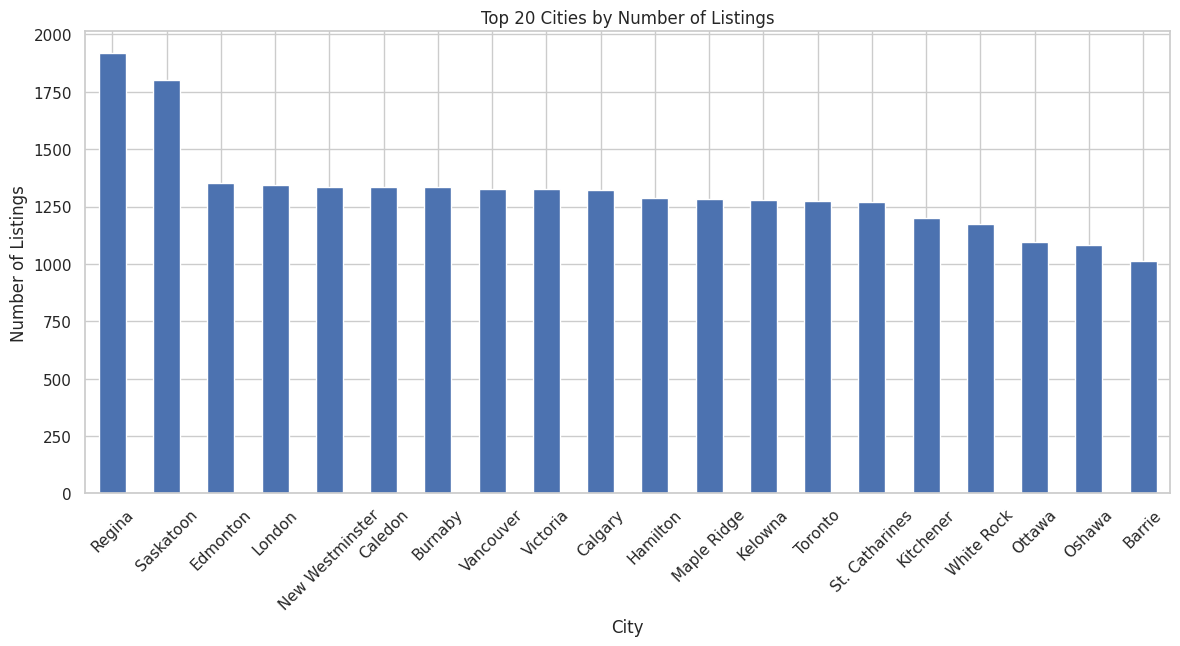

In [ ]:
plt.figure(figsize=(14,6))
df['City'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Cities by Number of Listings")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

Regina has the highest number of listings (1950),
followed by Saskatoon (~1800).

Most cities in the top 20 have fairly similar listing volumes, ranging from ~1000 to 1400.

Bigger cities like Toronto, Ottawa, and Vancouver are not leading in listing counts, which might be surprising — this could suggest:

Higher competition

Stricter market

Or the dataset includes relatively more listings from smaller citie

**Bivariate Analysis**

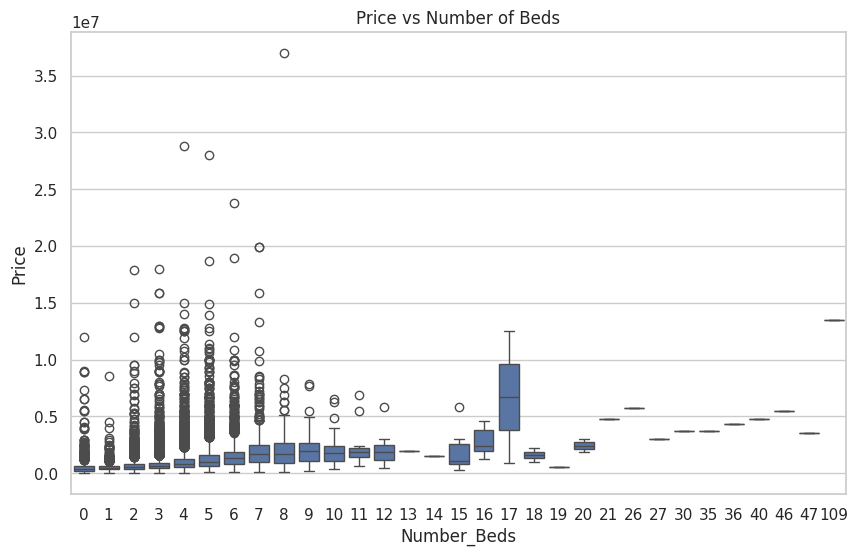

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Number_Beds', y='Price', data=df)
plt.title("Price vs Number of Beds")
plt.show()



House prices generally increase with the number of bedrooms. Most 1–5 bedroom homes are priced below 1 million
 but some go beyond $10 million. Outliers with 46 and 109 bedrooms likely indicate anomalies or non-residential listings.

**Average Prices Acccoding to cities**


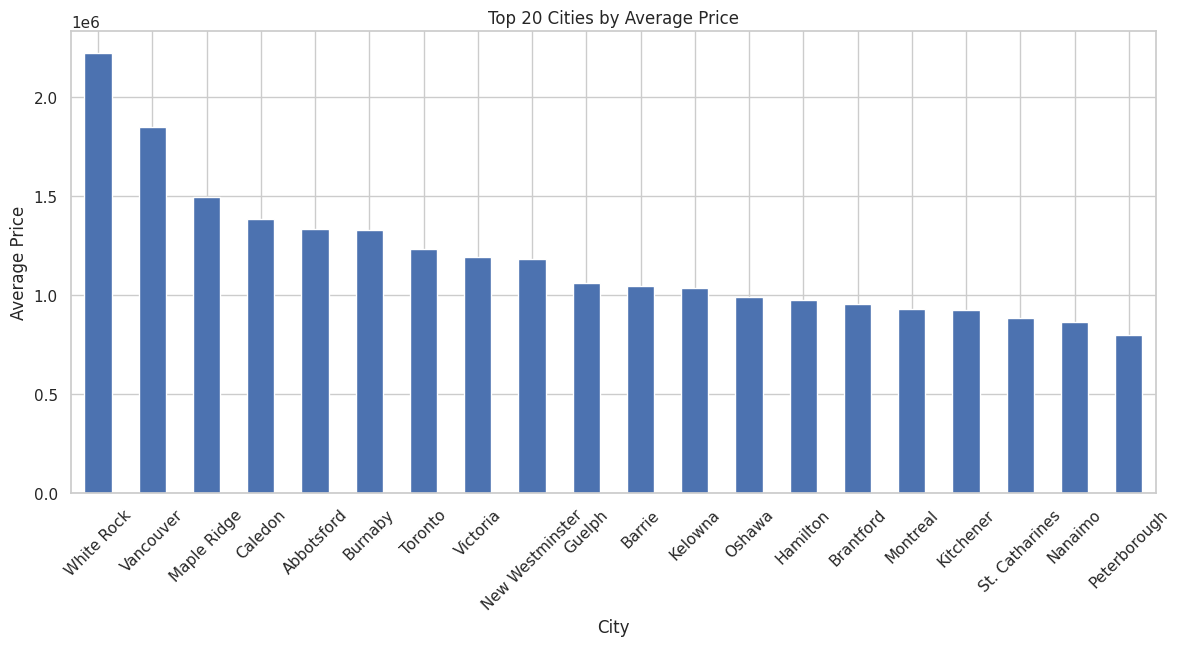

In [ ]:
avg_price_by_city = df.groupby('City')['Price'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,6))
avg_price_by_city.plot(kind='bar')
plt.title("Top 20 Cities by Average Price")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


the data shows White Rock has the highest average house price (over $2 million), followed by Vancouver (~$1.8M).

Cities like Toronto and Victoria also have high average prices, while others like Peterborough and Nanaimo are on the lower end of this top 20 list.

This gives us insight into which cities are the most expensive on average in your dataset.

**Performing Data Wrangling**


Handle Missing Values

In [ ]:
df.loc[5:10, 'Price'] = None
df.loc[15:17, 'Number_Beds'] = None

# Check missing values
print(df.isnull().sum())


City                    0
Price                   6
Address                 0
Number_Beds             3
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64


Creating New Columns by applying Feature Engineering

In [ ]:
df['Price_per_Bed'] = df['Price'] / df['Number_Beds']
df['Price_per_Bed'] = df['Price_per_Bed'].replace([np.inf, -np.inf], np.nan).fillna(0)



In [ ]:
df.rename(columns={'Number_Beds': 'Beds', 'Number_Baths': 'Baths'}, inplace=True)


In [ ]:
#checking the new data now
df

,City,Price,Address,Beds,Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Price_per_Bed
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3.0,2,Ontario,5647656,43.7417,-79.3733,97000.0,2.599667e+05
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3.0,1,Ontario,5647656,43.7417,-79.3733,97000.0,2.666663e+05
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2.0,2,Ontario,5647656,43.7417,-79.3733,97000.0,3.999500e+05
3,Toronto,1200000.0,275 MORTIMER AVE,4.0,2,Ontario,5647656,43.7417,-79.3733,97000.0,3.000000e+05
4,Toronto,668800.0,#420 -388 RICHMOND ST,1.0,1,Ontario,5647656,43.7417,-79.3733,97000.0,6.688000e+05
...,...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2.0,2,Nova Scotia,431479,44.8857,63.1005,86753.0,2.199500e+05
35764,Halifax,6990000.0,1160 Rockcliffe Street,5.0,5,Nova Scotia,431479,44.8857,63.1005,86753.0,1.398000e+06
35765,Halifax,419900.0,212 60 Walter Havill Drive,2.0,2,Nova Scotia,431479,44.8857,63.1005,86753.0,2.099500e+05
35766,Halifax,949900.0,10 Idlewylde Road,3.0,1,Nova Scotia,431479,44.8857,63.1005,86753.0,3.166333e+05


**Performing EDA (Exploratory Data Analysis)**

In [ ]:
# Overall summary
df.describe()


,Price,Beds,Baths,Population,Latitude,Longitude,Median_Family_Income,Price_per_Bed
count,3.576200e+04,35765.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000,3.576800e+04
mean,9.432937e+05,3.283685,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416,2.954573e+05
std,1.020179e+06,1.730708,1.371910,1.120016e+06,3.333855,22.280935,12132.353510,2.800260e+05
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000,0.000000e+00
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000,1.475000e+05
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000,2.370000e+05
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000,3.649000e+05
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000,8.945000e+06


In [ ]:
# Summary for categorical variables
df.describe(include='object')

,City,Address,Province
count,35768,35768,35768
unique,45,31379,9
top,Regina,#NAME?,Ontario
freq,1917,32,14015


In [ ]:
df.describe(include='object')

# Count of listings per city
df['City'].value_counts().head(10)


,count
City,
Regina,1917
Saskatoon,1800
Edmonton,1351
London,1345
New Westminster,1337
Caledon,1336
Burnaby,1334
Vancouver,1328
Victoria,1325


**Price per Bedroom**

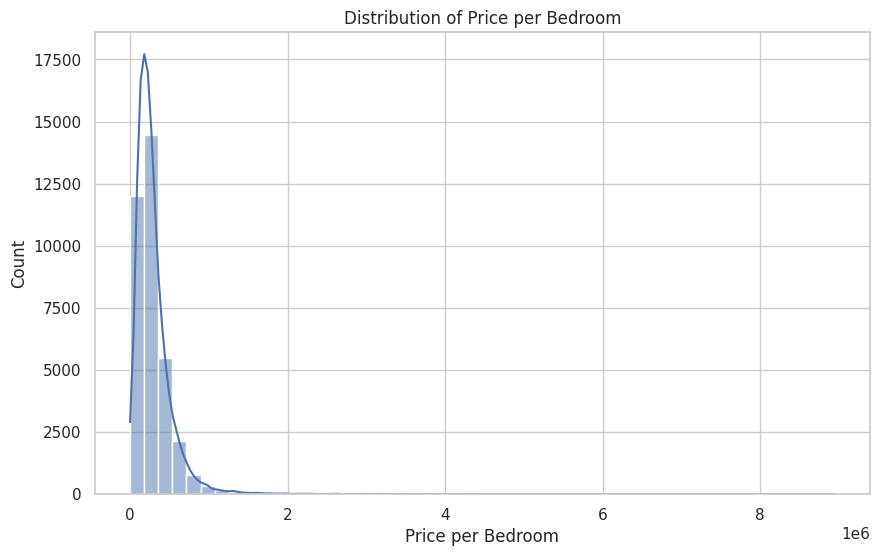

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price_per_Bed'], bins=50, kde=True)
plt.title("Distribution of Price per Bedroom")
plt.xlabel("Price per Bedroom")
plt.show()


**Regression Analysis (Linear)**

predicing Price using number of beds, baths, population, and income.

In [ ]:

# x are the features
# y is the target

X = df[['Beds', 'Baths', 'Population', 'Median_Family_Income']]

y = df['Price']

# splitting the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print("Missing values in X:")
print(X.isnull().sum())

print("\nAny missing values?:", X.isnull().values.any())


Missing values in X:
Beds                    3
Baths                   0
Population              0
Median_Family_Income    0
dtype: int64

Any missing values?: True


In [ ]:
print("Missing values in y:", y.isnull().sum())


Missing values in y: 6


In [ ]:
data = pd.concat([X, y], axis=1)

# Drop any rows with NaNs
data_clean = data.dropna()

# Split them back
X = data_clean[['Beds', 'Baths', 'Population', 'Median_Family_Income']]
y = data_clean['Price']


In [ ]:
# rechecking the data after droping

print("Missing values in X:")
print(X.isnull().sum())

print("\nAny missing values?:", X.isnull().values.any())


Missing values in X:
Beds                    0
Baths                   0
Population              0
Median_Family_Income    0
dtype: int64

Any missing values?: False


In [ ]:
# now Split and Train Again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Metrics
error = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(error)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): ${rmse:,.0f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): $783,147
R² Score: 0.27


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                Feature    Coefficient
0                  Beds  -12826.218691
1                 Baths  370112.075344
2            Population       0.103649
3  Median_Family_Income      -1.252144



We built a linear regression model to predict house prices using features like beds, baths, population, and income. The model gave an **RMSE of $783,147** and an **R² score of 0.27**, meaning it explains only 27% of the variation in prices.

**Clustering with K-Means**

Performing K-Means is to identify natural groupings (clusters)  in the data based on selected features like:

Price

Beds

Baths

Median_Family_Income

In [ ]:
features = df[['Price', 'Beds', 'Baths', 'Median_Family_Income']].copy()

features = features.dropna()


In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


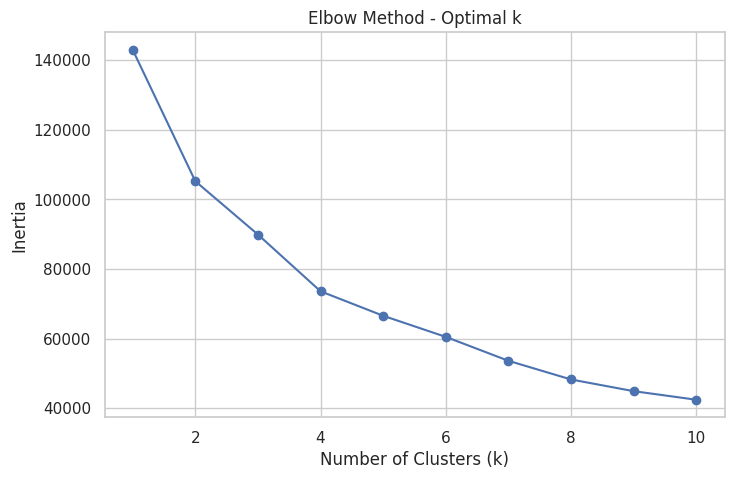

In [ ]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Used the Elbow Method to find the optimal number of clusters for K-Means. By plotting the inertia for k values from 1 to 10, we observed that the curve starts to level off around k = 3 or 4, suggesting that's the ideal number of clusters for grouping similar properties.

In [ ]:
features = df[['Price', 'Beds', 'Baths', 'Median_Family_Income']].copy()
features_clean = features.dropna()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clean)

# Run K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Assign clusters ONLY to the cleaned rows
df_clean = df.loc[features_clean.index].copy()
df_clean['Cluster'] = clusters


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(features_scaled)


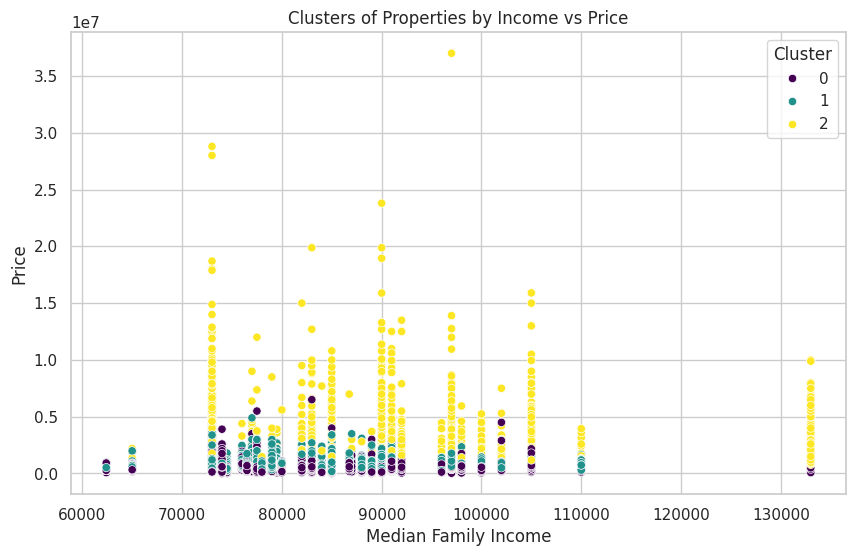

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Median_Family_Income',
    y='Price',
    hue='Cluster',
    data=df_clean,
    palette='viridis'
)
plt.title("Clusters of Properties by Income vs Price")
plt.xlabel("Median Family Income")
plt.ylabel("Price")
plt.legend(title='Cluster')
plt.show()



This scatter plot shows 3 clusters of properties based on **Median Family Income** (x-axis) and **Price** (y-axis).  

- **Cluster 2 (yellow)** mostly includes **high-priced properties**, spread across various income levels — likely luxury homes.  
- **Cluster 0 and 1** (purple and teal) contain more **affordable to mid-range homes**, with similar price ranges but slightly different income groupings.  


## Predictive Models


Performing basic processing on data set for predictive models:

In [ ]:
df_mp = df.copy()
data_clean.head()
# df_mp.shape

,Beds,Baths,Population,Median_Family_Income,Price
0,3.0,2,5647656,97000.0,779900.0
1,3.0,1,5647656,97000.0,799999.0
2,2.0,2,5647656,97000.0,799900.0
3,4.0,2,5647656,97000.0,1200000.0
4,1.0,1,5647656,97000.0,668800.0


In [ ]:
# Dropping irrelevant column if not already removed
if 'Address' in df_mp.columns:
    df_mp = df_mp.drop(columns=['Address'])

# Check the number of unique values for categorical variables before encoding them
print("Unique cities in original data:", df['City'].unique().size)
print("Unique provinces in original data:", df['Province'].unique().size)

# Applying the label encoder on both categrical columns and adding the encoded columns to the dataframe
label_encoder_city = LabelEncoder()
df_mp['City_encoded'] = label_encoder_city.fit_transform(df_mp['City'])

label_encoder_province = LabelEncoder()
df_mp['Province_encoded'] = label_encoder_province.fit_transform(df_mp['Province'])

# Dropping categorical columns and keeping encoded ones for training
if 'City' in df_mp.columns:
    df_mp = df_mp.drop(columns=['City'])
if 'Province' in df_mp.columns:
    df_mp = df_mp.drop(columns=['Province'])

# Printing each encoded value to its original categorical value
print("City Encoding Mappings:")
for i, city in enumerate(label_encoder_city.classes_):
    print(f"{i}: {city}")

print("\nProvince Encoding Mappings:")
for i, province in enumerate(label_encoder_province.classes_):
    print(f"{i}: {province}")

Unique cities in original data: 45
Unique provinces in original data: 9
City Encoding Mappings:
0: Abbotsford
1: Airdrie
2: Barrie
3: Brantford
4: Burnaby
5: Caledon
6: Calgary
7: Edmonton
8: Guelph
9: Halifax
10: Hamilton
11: Kamloops
12: Kelowna
13: Kingston
14: Kitchener
15: Lethbridge
16: London
17: Maple Ridge
18: Medicine Hat
19: Moncton
20: Montreal
21: Nanaimo
22: New Westminster
23: Oshawa
24: Ottawa
25: Peterborough
26: Prince George
27: Quebec
28: Red Deer
29: Regina
30: Saint John
31: Saskatoon
32: Sault Ste. Marie
33: Sherbrooke
34: St. Catharines
35: St. John's
36: Sudbury
37: Thunder Bay
38: Toronto
39: Trois-Rivieres
40: Vancouver
41: Victoria
42: White Rock
43: Windsor
44: Winnipeg

Province Encoding Mappings:
0: Alberta
1: British Columbia
2: Manitoba
3: New Brunswick
4: Newfoundland and Labrador
5: Nova Scotia
6: Ontario
7: Quebec
8: Saskatchewan


In [ ]:
df_mp.head()

,Price,Beds,Baths,Population,Latitude,Longitude,Median_Family_Income,Price_per_Bed,City_encoded,Province_encoded
0,779900.0,3.0,2,5647656,43.7417,-79.3733,97000.0,259966.666667,38,6
1,799999.0,3.0,1,5647656,43.7417,-79.3733,97000.0,266666.333333,38,6
2,799900.0,2.0,2,5647656,43.7417,-79.3733,97000.0,399950.000000,38,6
3,1200000.0,4.0,2,5647656,43.7417,-79.3733,97000.0,300000.000000,38,6
4,668800.0,1.0,1,5647656,43.7417,-79.3733,97000.0,668800.000000,38,6


In [ ]:
# Droping rows with any NaN values
df_mp_cleaned = df_mp.dropna()
df_mp_cleaned

,Price,Beds,Baths,Population,Latitude,Longitude,Median_Family_Income,Price_per_Bed,City_encoded,Province_encoded
0,779900.0,3.0,2,5647656,43.7417,-79.3733,97000.0,2.599667e+05,38,6
1,799999.0,3.0,1,5647656,43.7417,-79.3733,97000.0,2.666663e+05,38,6
2,799900.0,2.0,2,5647656,43.7417,-79.3733,97000.0,3.999500e+05,38,6
3,1200000.0,4.0,2,5647656,43.7417,-79.3733,97000.0,3.000000e+05,38,6
4,668800.0,1.0,1,5647656,43.7417,-79.3733,97000.0,6.688000e+05,38,6
...,...,...,...,...,...,...,...,...,...,...
35763,439900.0,2.0,2,431479,44.8857,63.1005,86753.0,2.199500e+05,9,5
35764,6990000.0,5.0,5,431479,44.8857,63.1005,86753.0,1.398000e+06,9,5
35765,419900.0,2.0,2,431479,44.8857,63.1005,86753.0,2.099500e+05,9,5
35766,949900.0,3.0,1,431479,44.8857,63.1005,86753.0,3.166333e+05,9,5


Defining features and target columns and setting testing and training dataset weights:

In [ ]:
# Defining features and target
X = df_mp_cleaned.drop('Price', axis=1)
y = df_mp_cleaned['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_mp_cleaned.head()

,Price,Beds,Baths,Population,Latitude,Longitude,Median_Family_Income,Price_per_Bed,City_encoded,Province_encoded
0,779900.0,3.0,2,5647656,43.7417,-79.3733,97000.0,259966.666667,38,6
1,799999.0,3.0,1,5647656,43.7417,-79.3733,97000.0,266666.333333,38,6
2,799900.0,2.0,2,5647656,43.7417,-79.3733,97000.0,399950.000000,38,6
3,1200000.0,4.0,2,5647656,43.7417,-79.3733,97000.0,300000.000000,38,6
4,668800.0,1.0,1,5647656,43.7417,-79.3733,97000.0,668800.000000,38,6


## Note: The following is applicable for all models

* Rankings were determined using an affordability index, which take into account
the median family income and over the predicted house prices calculated by each respective model.

* A higher affordability index would correlate to a more affordable (cheaper)
house, while a smaller index would represent a more expensive one.

 ### Predictive Model: Linear Regression

From the Linear Regression analysis, Newfoundland and Labrador, Ontario and Quebec an Saskatchewan would be the most affordable provinces while the most expensive would be New Brunswick and Alberta.

**Top 3 Most Affordable Cities predicted by Linear Regression:**

* City: St. John's (35.0), Affordability Index: 0.3783

* City: Thunder Bay (37.0), Affordability Index: 0.3566

* City: Quebec (27.0), Affordability Index: 0.3122

**Top 3 Least Affordable Cities predicted by Linear Regression:**

* City: Moncton (19.0), Affordability Index: -4.2821

* City: Edmonton (7.0), Affordability Index: -0.3557

* City: Saint John (30.0), Affordability Index: -0.0240

**Evaluation Metrics for Linear Regression:**

* R²: 0.77

* MAE: 233396.54

* RMSE: 444102.12

* F1 Score: 0.86

* MCC Score: 0.70

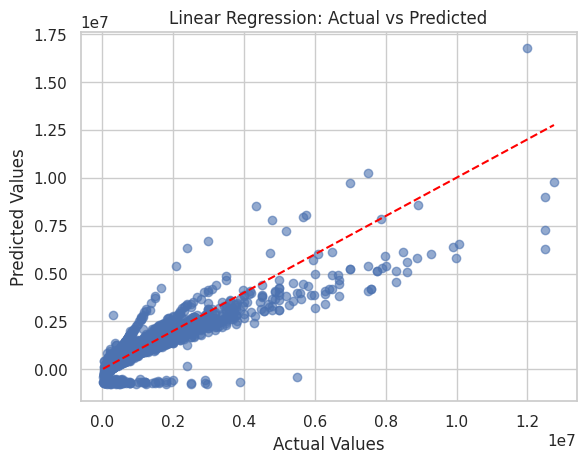

Top 3 Most Affordable Cities (Linear Regression):
City: 35.0, Affordability Index: 0.3783
City: 37.0, Affordability Index: 0.3566
City: 27.0, Affordability Index: 0.3122

Top 3 Least Affordable Cities (Linear Regression):
City: 30.0, Affordability Index: -0.0240
City: 7.0, Affordability Index: -0.3557
City: 19.0, Affordability Index: -4.2821

Evaluation Metrics for Decision Tree:
R²: 0.77
MAE: 233396.54
RMSE: 444102.12
F1 Score: 0.86
MCC Score: 0.70


<ipython-input-1096-058c7d4c0522>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Predicted_Price_LR'] = lr_model.predict(X_without_price)
<ipython-input-1096-058c7d4c0522>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Affordability_Index_LR'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_LR']


In [ ]:
# Training Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Converting regression predictions to binary classification
threshold = y_test.median()  # Use median of y_test as the threshold
y_test_class = (y_test > threshold).astype(int)
y_pred_lr_class = (y_pred_lr > threshold).astype(int)

# Calculating F1 Score and MCC
f1_lr = f1_score(y_test_class, y_pred_lr_class)
mcc_lr = matthews_corrcoef(y_test_class, y_pred_lr_class)

# Plottting predictions vs actual values
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# Predicting prices for the full dataset
df_mp_cleaned['Predicted_Price_LR'] = lr_model.predict(X_without_price)

# Calculating the Affordability Index based mon Median_Family_Income and Predicted_Price_LR
df_mp_cleaned['Affordability_Index_LR'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_LR']

# Ranking cities by Affordability Index
city_affordability_lr = df_mp_cleaned.groupby('City_encoded')['Affordability_Index_LR'].mean().reset_index()
city_affordability_lr = city_affordability_lr.sort_values(by='Affordability_Index_LR', ascending=False)

# Top 3 most affordable cities
top_3_most_affordable = city_affordability_lr.head(3)
print("Top 3 Most Affordable Cities (Linear Regression):")
for index, row in top_3_most_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_LR']:.4f}")

# Top 3 least affordable cities
top_3_least_affordable = city_affordability_lr.tail(3)
print("\nTop 3 Least Affordable Cities (Linear Regression):")
for index, row in top_3_least_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_LR']:.4f}")

# Printing accuracy metrics
print("\nEvaluation Metrics for Decision Tree:")
print(f"R²: {r2_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"MCC Score: {mcc_lr:.2f}")

### Predictive Model: Decision Tree

From the decision tree analysis, both Alberta an Saskatchewan would be the most affordable provinces while the most expensive would be British Columbia.


**Top 3 Most Affordable Cities predicted by Decision Tree:**

City: Red Deer (29), Affordability Index: 0.293993

City: Edmonton (7), Affordability Index: 0.274528

City: Saskatoon (31), Affordability Index: 0.237477

**Top 3 Least Affordable Cities predicted by Decision Tree:**

City: White Rock(42), Affordability Index: 0.057699

City: Vancouver (40), Affordability Index: 0.080238

City: Burnaby (4), Affordability Index: 0.090136

**Evaluation Metrics for Decision Tree: (Increase depth for better accuracy)**

R²: 0.95

MAE: 96645.90

RMSE: 213358.26

F1 Score: 0.93

MCC Score: 0.85

<ipython-input-1097-7174867e2677>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned.loc[:, 'Predicted_Price_DT'] = dt_model.predict(X_without_price)
<ipython-input-1097-7174867e2677>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned.loc[:, 'Affordability_Index_DT'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_DT']


Cities ranked by affordability (most affordable to least affordable):
    City_encoded  Affordability_Index_DT
29            29                0.293993
7              7                0.274528
31            31                0.237477
35            35                0.233780
15            15                0.231319
37            37                0.226422
32            32                0.226111
28            28                0.224448
44            44                0.212623
30            30                0.209347
26            26                0.207382
18            18                0.205010
19            19                0.204177
1              1                0.201319
6              6                0.200320
27            27                0.193826
36            36                0.188754
24            24                0.166635
43            43                0.166508
9              9                0.150803
33            33                0.148800
11            11            

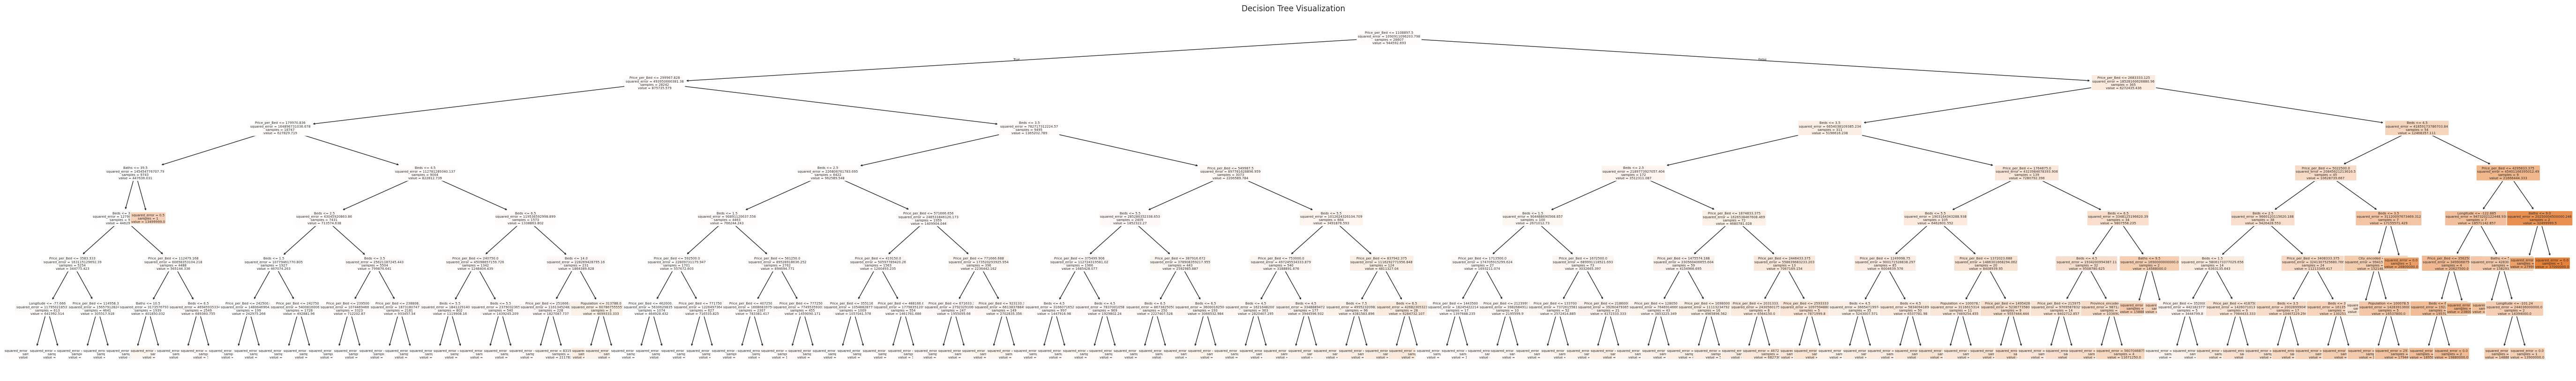

In [ ]:
# Training the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=7, random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions for the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating evaluation metrics for Decision Tree
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Thresholding for F1 and MCC (using the median of y_test as the threshold)
threshold = y_test.median()
y_pred_dt_class = (y_pred_dt > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# F1 Score for classification (high price vs. low price)
f1_dt = f1_score(y_test_class, y_pred_dt_class)

# MCC for classification (high price vs. low price)
mcc_dt = matthews_corrcoef(y_test_class, y_pred_dt_class)

# Predict prices for the full dataset
df_mp_cleaned.loc[:, 'Predicted_Price_DT'] = dt_model.predict(X_without_price)

# Calculating the Affordability Index based on Median_Family_Income and Predicted_Price_DT
df_mp_cleaned.loc[:, 'Affordability_Index_DT'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_DT']

# Ranking cities by Affordability Index
city_affordability_dt = df_mp_cleaned.groupby('City_encoded')['Affordability_Index_DT'].mean().reset_index()

# Sorting cities by Affordability Index (most affordable to least affordable)
city_affordability_dt = city_affordability_dt.sort_values(by='Affordability_Index_DT', ascending=False)

# Displaying the cities from most affordable to least affordable
print("Cities ranked by affordability (most affordable to least affordable):")
print(city_affordability_dt)

# Identifying the cheapest city based on the highest Affordability Index
cheapest_city_dt = city_affordability_dt.iloc[0]
print(f"\nPredicted Cheapest City (Decision Tree): {cheapest_city_dt['City_encoded']} with Affordability Index: {cheapest_city_dt['Affordability_Index_DT']:.4f}")

# Displaying evaluation metrics below the chart
print("\nEvaluation Metrics for Decision Tree:")
print(f"R²: {r2_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"MCC Score: {mcc_dt:.2f}")

# Plotting the Decision Tree
plt.figure(figsize=(70, 10))  # Increase/decrease to view overlapped decision boxes
plot_tree(dt_model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=5)
plt.title("Decision Tree Visualization")
plt.show()




###  Predictive Model: Random Forest:(Tweak leafs,depth, etc.)

From the Random Forest analysis, both Alberta an Saskatchewan would be the most affordable provinces while the most expensive would be British Columbia.


**Top 3 Most Affordable Cities predicted by Random Forest:**

* City: Red Deer (29), Affordability Index: 0.4039

* City: Edmonton (7), Affordability Index: 0.3442

* City: Saskatoon (31), Affordability Index: 0.2824

**Top 3 Least Affordable Cities predicted by Random Forest:**

* City: White Rock(42), Affordability Index: 0.0570

* City: Vancouver (40), Affordability Index: 0.0793

* City: Burnaby (4), Affordability Index: 0.0904

**Evaluation Metrics for Random Forest: (Increased max_depth for random forest regressor to get better accuracy)**

* R²: 0.98

* MAE: 14698.42

* RMSE: 140135.14

* F1 Score: 0.99

* MCC Score: 0.99



<ipython-input-1098-14141c4b1ed0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Predicted_Price_RF'] = rf_model.predict(X_without_price)
<ipython-input-1098-14141c4b1ed0>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Affordability_Index_RF'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_RF']


Predicted Cheapest City (Random Forest): 29.0 with Affordability Index: 0.4034

Evaluation Metrics for random forest:
R²: 0.98
MAE: 13254.03
RMSE: 136966.54
F1 Score: 0.99
MCC Score: 0.99
Top 3 Most Affordable Cities:
City: 29.0, Affordability Index: 0.4034
City: 7.0, Affordability Index: 0.3434
City: 31.0, Affordability Index: 0.2828

Top 3 Least Affordable Cities:
City: 4.0, Affordability Index: 0.0903
City: 40.0, Affordability Index: 0.0792
City: 42.0, Affordability Index: 0.0570


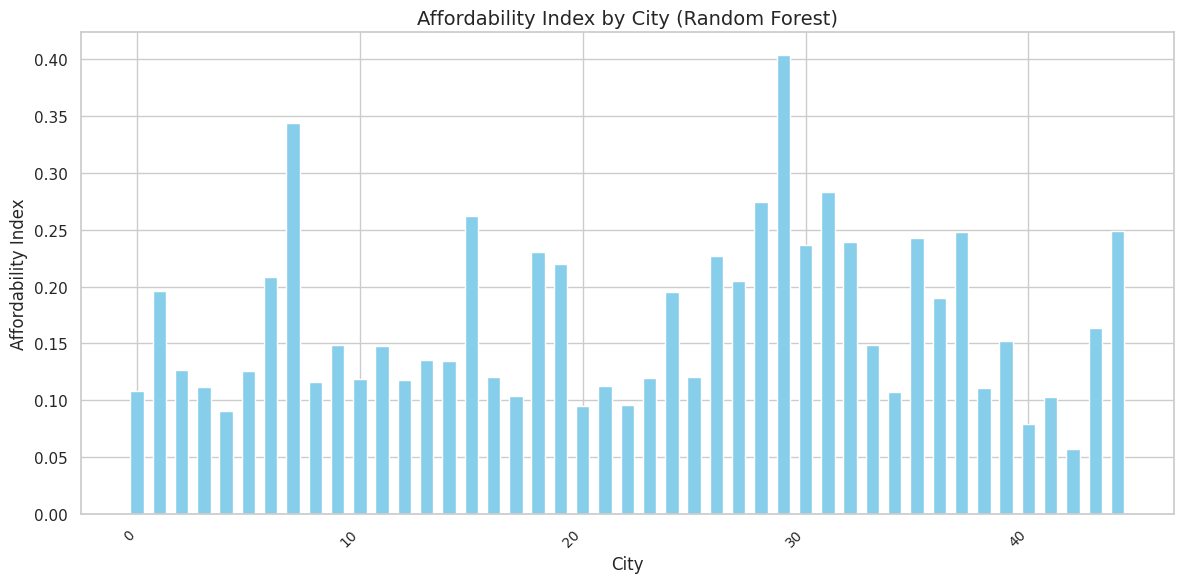

In [ ]:
# Training Random Forest Regressor
rf_model = RandomForestRegressor(
    # n_estimators=3,        # Increase the number of trees
    max_depth=70,            # Increase depth for allowing deeper trees
    random_state=42          # Ensure reproducibility
)

rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model (Regression Metrics)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Thresholding for Classification (e.g., using median price as the threshold)
threshold = y_test.median()
y_pred_rf_class = (y_pred_rf > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Evaluating the model (Classification Metrics)
f1_rf = f1_score(y_test_class, y_pred_rf_class)
mcc_rf = matthews_corrcoef(y_test_class, y_pred_rf_class)

# Predicting prices for the full dataset
df_mp_cleaned['Predicted_Price_RF'] = rf_model.predict(X_without_price)

# Calculating the Affordability Index
df_mp_cleaned['Affordability_Index_RF'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_RF']

# Ranking cities by Affordability Index
city_affordability_rf = df_mp_cleaned.groupby('City_encoded')['Affordability_Index_RF'].mean().reset_index()
city_affordability_rf = city_affordability_rf.sort_values(by='Affordability_Index_RF', ascending=False)

# Displaying the most affordable city
cheapest_city_rf = city_affordability_rf.iloc[0]
print(f"Predicted Cheapest City (Random Forest): {cheapest_city_rf['City_encoded']} with Affordability Index: {cheapest_city_rf['Affordability_Index_RF']:.4f}")

# Plotting Affordability Index for all cities (tight layout)
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.bar(
    city_affordability_rf['City_encoded'],
    city_affordability_rf['Affordability_Index_RF'],
    color='skyblue',
    width=0.6  # Adjust bar width for a tighter look
)

# Printing metrics
print("\nEvaluation Metrics for random forest:")
print(f"R²: {r2_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"MCC Score: {mcc_rf:.2f}")

# Top 3 most affordable cities
top_3_most_affordable = city_affordability_rf.head(3)
print("Top 3 Most Affordable Cities:")
for index, row in top_3_most_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_RF']:.4f}")

# Top 3 least affordable cities
top_3_least_affordable = city_affordability_rf.tail(3)
print("\nTop 3 Least Affordable Cities:")
for index, row in top_3_least_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_RF']:.4f}")

plt.xlabel("City", fontsize=12)
plt.ylabel("Affordability Index", fontsize=12)
plt.title("Affordability Index by City (Random Forest)", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align city labels
plt.tight_layout()  # Ensuring everything fits within the figure
plt.show()



 ### Predictive Model: Gradient Boosting

 From the Gradient Boosting analysis, both Alberta an Saskatchewan would be the most affordable provinces while the most expensive would be British Columbia.


**Top 3 Most Affordable Cities predicted by Gradient Boosting:**

* City: Red Deer (29), Affordability Index: 0.4052

* City: Edmonton (7), Affordability Index: 0.3438

* City: Saskatoon (31), Affordability Index: 0.2834

**Top 3 Least Affordable Cities predicted by Gradient Boosting:**

* City: White Rock(42), Affordability Index: 0.0570

* City: Vancouver (40), Affordability Index: 0.0792

* City: Burnaby (4), Affordability Index: 0.0903

**Evaluation Metrics for Gradient Boosting: (Increase depth and learning rate for better accuracy)**

* R²: 0.97

* MAE: 16018.51

* RMSE: 152122.05

* F1 Score: 0.99

* MCC Score: 0.97



<ipython-input-1102-9385eb1d15f2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Predicted_Price_GB'] = gb_model.predict(X_without_price)
<ipython-input-1102-9385eb1d15f2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_cleaned['Affordability_Index_GB'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_GB']


Predicted Cheapest City (Gradient Boosting): 29.0 with Affordability Index: 0.4052

Evaluation Metrics for Gradient Boosting:
R²: 0.97
MAE: 16018.51
RMSE: 152122.05
F1 Score: 0.99
MCC Score: 0.97

Top 3 Most Affordable Cities (Gradient Boosting):
City: 29.0, Affordability Index: 0.4052
City: 7.0, Affordability Index: 0.3438
City: 31.0, Affordability Index: 0.2834

Top 3 Least Affordable Cities (Gradient Boosting):
City: 4.0, Affordability Index: 0.0903
City: 40.0, Affordability Index: 0.0792
City: 42.0, Affordability Index: 0.0570


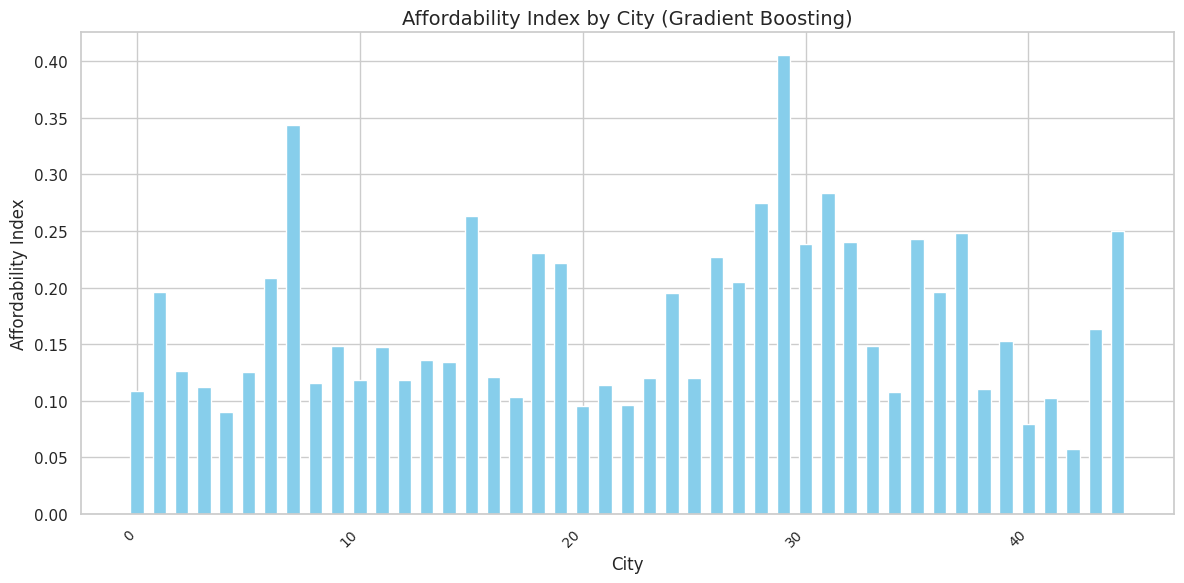

In [ ]:
# Training Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=10, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model (Regression Metrics)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Thresholding for Classification (e.g., using median price as the threshold)
threshold = y_test.median()
y_pred_gb_class = (y_pred_gb > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Evaluating the model (Classification Metrics)
f1_gb = f1_score(y_test_class, y_pred_gb_class)
mcc_gb = matthews_corrcoef(y_test_class, y_pred_gb_class)

# Predicting prices for the full dataset
df_mp_cleaned['Predicted_Price_GB'] = gb_model.predict(X_without_price)

# Calculating the Affordability Index
df_mp_cleaned['Affordability_Index_GB'] = df_mp_cleaned['Median_Family_Income'] / df_mp_cleaned['Predicted_Price_GB']

# Ranking cities by Affordability Index
city_affordability_gb = df_mp_cleaned.groupby('City_encoded')['Affordability_Index_GB'].mean().reset_index()
city_affordability_gb = city_affordability_gb.sort_values(by='Affordability_Index_GB', ascending=False)

# Displaying the most affordable city
cheapest_city_gb = city_affordability_gb.iloc[0]
print(f"Predicted Cheapest City (Gradient Boosting): {cheapest_city_gb['City_encoded']} with Affordability Index: {cheapest_city_gb['Affordability_Index_GB']:.4f}")

# Plotting Affordability Index for all cities
plt.figure(figsize=(12, 6))
plt.bar(
    city_affordability_gb['City_encoded'],
    city_affordability_gb['Affordability_Index_GB'],
    color='skyblue',
    width=0.6
)
# Printing metrics
print("\nEvaluation Metrics for Gradient Boosting:")
print(f"R²: {r2_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"MCC Score: {mcc_gb:.2f}")

# Top 3 most affordable cities
top_3_most_affordable = city_affordability_gb.head(3)
print("\nTop 3 Most Affordable Cities (Gradient Boosting):")
for index, row in top_3_most_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_GB']:.4f}")

# Top 3 least affordable cities
top_3_least_affordable = city_affordability_gb.tail(3)
print("\nTop 3 Least Affordable Cities (Gradient Boosting):")
for index, row in top_3_least_affordable.iterrows():
    print(f"City: {row['City_encoded']}, Affordability Index: {row['Affordability_Index_GB']:.4f}")

plt.xlabel("City", fontsize=12)
plt.ylabel("Affordability Index", fontsize=12)
plt.title("Affordability Index by City (Gradient Boosting)", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()



# Discussion

Random Forest has proven to be the best-performing model since it has the highest R² score (0.98), suggesting that the predictions align with the actual data. It has the lowest MAE (13,254.03) and RMSE  (136,966.54) values, indicating that predictions are more accurate overall and that both small and larger errors are less present in the predictions. It has amongst the highest F1 scores (0.99), suggesting that it’s good at handling precision and recall, allowing more accurate classification. Lastly, it had the highest MCC score  (0.99), which indicates that there is a strong correlation between the predicted and actual values.

In second place for best performing model, we have Gradient Boosting. With a very close R² (0.97) to Random Forest, it also suggests an almost perfect match between the predicted and actual data. Although Gradient Booster has a slightly higher tendency of making errors as can be seen with both  MAE (16,018.51) and RMSE (152,122.05). Despite having the same F1 score (0.99), Gradient Booster has a slightly lower MCC Score (0.97), making it a bit less accurate when is comes to binary classification.

In third place, we have the Decision Tree model. This model has a slightly lower R² (0.95) than the above two models, suggesting that the predictions are slightly less accurate than the actual data. Decision Tree tends to make a lot more smaller and larger errors by having significantly higher MAE (96,645.90) and RMSE (213,358.26) scores. This model has a slightly lower F1 score in comparison to both Random Forest and Gradient Boosting. Lastly, this model displays less accurate correlation between the predicted and actual data by having a lower MCC Score (0.85).

Lastly, in fourth place, the worst-performing prediction model is Linear Regression. It has the lowest R² (0.77) suggests that the predicted data doesn’t match as well to the actual data. With the highest error scores for both MAE (233,396.54) and RMSE (444,102.12), this model tends to make a large number of errors, affecting the accuracy of the predictions. It has a moderate performance indicated by the F1 Score (0.86) and is the worst amongst all 4 when it comes to binary classification, as indicated by having the lowest MCC Score (0.70).

Note: It is important to note that the highest performing models were achieved by tuning parameters such as the max_depth (Random Forest, Gradient Boosting and Decision Tree) and learning rates (Gradient Boosting).
Considering the Random Forest model to be the most accurate, we can safely assume that in the coming years, the top 3 most affordable cities with be Red Deer, Edmonton and Saskatoon, while the most unaffordable ones will be White Rock, Vancouver and Burnaby, from Table 10.





#Conclusion

To conclude, exploratory data analysis was conducted by performing descriptive data analysis and data wrangling. The purpose of performing these processes was to analyze and clean the dataset to be used in the predictive modeling step. In the predictive modeling step, 4 models were trained and compared using 5 accuracy metrics. The comparison of these yielded that the best performing model with the least amount of errors was the Random Forest model, followed by Gradient Boosting and Decision Tree, while the worst performing model was Linear regression. It is important to note that parameters such as max_depth and learning_rates were used to fine-tune the models to achieve better accuracy, which may have played a role in their performance ranking. Lastly, given that the Random Forest is the most accurate, based on its predictions, we can predict that in the coming years the top 3 most affordable cities will be Red Deer, Edmonton and Saskatoon while the most unaffordable ones will be White Rock, Vancouver and Burnaby.